In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('wandb.csv')

In [2]:
fifty = df[(df['architecture'] == '3DCNN_64_stride1') & (df['training_set'] == 50000)]

In [3]:
two_hundred = df[(df['architecture'] == '3DCNN_64_stride1') & (df['training_set'] == 200000)]

In [4]:
fifty = fifty[['Name', 'validation_loss', 'activation_fn', 'kernel_size', 'epochs_choice', 'learning_rate']]

In [5]:
two_hundred = two_hundred[['Name', 'validation_loss', 'activation_fn', 'kernel_size', 'epochs_choice', 'learning_rate']]

In [6]:
two_hundred['kernel_size'].value_counts()

kernel_size
3.0    108
5.0    108
Name: count, dtype: int64

In [7]:
two_hundred['activation_fn'].value_counts()

activation_fn
ReLU       108
Sigmoid    108
Name: count, dtype: int64

In [8]:
two_hundred['epochs_choice'].value_counts()

epochs_choice
5     36
10    36
20    36
25    36
30    36
15    36
Name: count, dtype: int64

In [9]:
two_hundred['learning_rate'].value_counts()

learning_rate
0.00001    72
0.00100    72
0.00010    72
Name: count, dtype: int64

In [10]:
fifty_agg = fifty.groupby(by = fifty.columns.drop('validation_loss').to_list()).agg(["mean", "median", "var", np.std]).reset_index()
fifty_agg

Name activation_fn kernel_size epochs_choice  \
                                                                               
0     3DCNN_50000_3_ReLU_10_0.0001_4          ReLU         3.0            10   
1      3DCNN_50000_3_ReLU_10_0.001_4          ReLU         3.0            10   
2      3DCNN_50000_3_ReLU_10_1e-05_4          ReLU         3.0            10   
3     3DCNN_50000_3_ReLU_15_0.0001_4          ReLU         3.0            15   
4      3DCNN_50000_3_ReLU_15_0.001_4          ReLU         3.0            15   
..                               ...           ...         ...           ...   
67  3DCNN_50000_5_Sigmoid_30_0.001_4       Sigmoid         5.0            30   
68  3DCNN_50000_5_Sigmoid_30_1e-05_4       Sigmoid         5.0            30   
69  3DCNN_50000_5_Sigmoid_5_0.0001_4       Sigmoid         5.0             5   
70   3DCNN_50000_5_Sigmoid_5_0.001_4       Sigmoid         5.0             5   
71   3DCNN_50000_5_Sigmoid_5_1e-05_4       Sigmoid         5.0             5   

   learning_rate validation_loss                                
                            mean    median       var       std  
0        0.00010        0.135554  0.135733  0.000010  0.003101  
1        0.00100        0.132288  0.133498  0.000006  0.002496  
2        0.00001        0.167530  0.168762  0.000099  0.009961  
3        0.00010        0.129336  0.129680  0.000018  0.004257  
4        0.00100        0.125435  0.122912  0.000023  0.004832  
..           ...             ...       ...       ...       ...  
67       0.00100        0.125567  0.125996  0.000075  0.008632  
68       0.00001        0.141318  0.137998  0.000039  0.006237  
69       0.00010        0.161042  0.158179  0.000191  0.013838  
70       0.00100        0.147773  0.143649  0.000098  0.009901  
71       0.00001        0.234513  0.239657  0.000172  0.013103  

[72 rows x 9 columns]

In [11]:
two_hundred_agg = two_hundred.groupby(by = two_hundred.columns.drop('validation_loss').to_list()).agg(["mean", "median", "var", np.std]).reset_index()
two_hundred_agg

Name activation_fn kernel_size epochs_choice  \
                                                                                
0     3DCNN_200000_3_ReLU_10_0.0001_4          ReLU         3.0            10   
1      3DCNN_200000_3_ReLU_10_0.001_4          ReLU         3.0            10   
2      3DCNN_200000_3_ReLU_10_1e-05_4          ReLU         3.0            10   
3     3DCNN_200000_3_ReLU_15_0.0001_4          ReLU         3.0            15   
4      3DCNN_200000_3_ReLU_15_0.001_4          ReLU         3.0            15   
..                                ...           ...         ...           ...   
67  3DCNN_200000_5_Sigmoid_30_0.001_4       Sigmoid         5.0            30   
68  3DCNN_200000_5_Sigmoid_30_1e-05_4       Sigmoid         5.0            30   
69  3DCNN_200000_5_Sigmoid_5_0.0001_4       Sigmoid         5.0             5   
70   3DCNN_200000_5_Sigmoid_5_0.001_4       Sigmoid         5.0             5   
71   3DCNN_200000_5_Sigmoid_5_1e-05_4       Sigmoid         5.0             5   

   learning_rate validation_loss                                
                            mean    median       var       std  
0        0.00010        0.118714  0.119169  0.000012  0.003456  
1        0.00100        0.114753  0.115782  0.000004  0.001969  
2        0.00001        0.137907  0.136235  0.000019  0.004406  
3        0.00010        0.117318  0.116469  0.000004  0.002051  
4        0.00100        0.121191  0.120088  0.000052  0.007193  
..           ...             ...       ...       ...       ...  
67       0.00100        0.101632  0.099931  0.000018  0.004212  
68       0.00001        0.118175  0.113961  0.000054  0.007356  
69       0.00010        0.136710  0.128703  0.000223  0.014919  
70       0.00100        0.124769  0.122727  0.000013  0.003634  
71       0.00001        0.149759  0.151107  0.000010  0.003171  

[72 rows x 9 columns]

In [12]:
validation_loss_50_mean = pd.Series(dtype = float)
validation_loss_200_mean = pd.Series(dtype = float)
validation_loss_50_var = pd.Series(dtype = float)
validation_loss_200_var = pd.Series(dtype = float)
kernel_sizes = pd.Series(dtype = int)
epochs_choices = pd.Series(dtype = int)
learning_rates = pd.Series(dtype = float)
activation_fns = pd.Series(dtype = str)

In [13]:
index = 0
for kernel_size in [3, 5]:
    for epochs_choice in [5, 10, 15, 20, 25, 30]:
        for learning_rate in [1e-3, 1e-4, 1e-5]:
            for activation_fn in ['ReLU', 'Sigmoid']:
                run_name = f'3DCNN_50000_{kernel_size}_{activation_fn}_{epochs_choice}_{learning_rate}_4'
                validation_loss_50_mean.loc[run_name] = fifty_agg[fifty_agg['Name'] == run_name]['validation_loss']['mean'].values[0]
                validation_loss_50_var.loc[run_name] = fifty_agg[fifty_agg['Name'] == run_name]['validation_loss']['var'].values[0]
                run_name = f'3DCNN_200000_{kernel_size}_{activation_fn}_{epochs_choice}_{learning_rate}_4'
                validation_loss_200_mean.loc[run_name] = two_hundred_agg[two_hundred_agg['Name'] == run_name]['validation_loss']['mean'].values[0]
                validation_loss_200_var.loc[run_name] = two_hundred_agg[two_hundred_agg['Name'] == run_name]['validation_loss']['var'].values[0]
                kernel_sizes[index] = kernel_size
                epochs_choices[index] = epochs_choice
                learning_rates[index] = learning_rate
                activation_fns[index] = activation_fn
                index += 1

In [14]:
comparison = pd.concat({'50k mean': pd.Series(validation_loss_50_mean.values), 
                        '200k mean': pd.Series(validation_loss_200_mean.values),
                        '50k var': pd.Series(validation_loss_50_var.values), 
                        '200k var': pd.Series(validation_loss_200_var.values),
                        'kernel_size': kernel_sizes,
                        'epochs_choice': epochs_choices,
                        'learning_rate': learning_rates,
                        'activation_fn': activation_fns}, axis = 1)
comparison['Name'] = validation_loss_50_mean.index
# comparison.sort_values(by = '50k', inplace = True)

In [15]:
comparison

,50k mean,200k mean,50k var,200k var,kernel_size,epochs_choice,learning_rate,activation_fn,Name
0,0.132420,0.117657,0.000005,7.884878e-07,3,5,0.00100,ReLU,3DCNN_50000_3_ReLU_5_0.001_4
1,0.149694,0.133186,0.000083,2.343325e-05,3,5,0.00100,Sigmoid,3DCNN_50000_3_Sigmoid_5_0.001_4
2,0.146784,0.125746,0.000044,3.853143e-06,3,5,0.00010,ReLU,3DCNN_50000_3_ReLU_5_0.0001_4
3,0.156139,0.134843,0.000087,2.442952e-05,3,5,0.00010,Sigmoid,3DCNN_50000_3_Sigmoid_5_0.0001_4
4,0.170906,0.146530,0.000010,2.121902e-06,3,5,0.00001,ReLU,3DCNN_50000_3_ReLU_5_1e-05_4
...,...,...,...,...,...,...,...,...,...
67,0.125567,0.101632,0.000075,1.774053e-05,5,30,0.00100,Sigmoid,3DCNN_50000_5_Sigmoid_30_0.001_4
68,0.116423,0.095176,0.000003,4.800282e-06,5,30,0.00010,ReLU,3DCNN_50000_5_ReLU_30_0.0001_4
69,0.126861,0.107476,0.000006,1.935850e-06,5,30,0.00010,Sigmoid,3DCNN_50000_5_Sigmoid_30_0.0001_4
70,0.125512,0.102093,0.000002,7.013686e-08,5,30,0.00001,ReLU,3DCNN_50000_5_ReLU_30_1e-05_4


In [16]:
comparison.to_csv('comparison.csv', index = False)

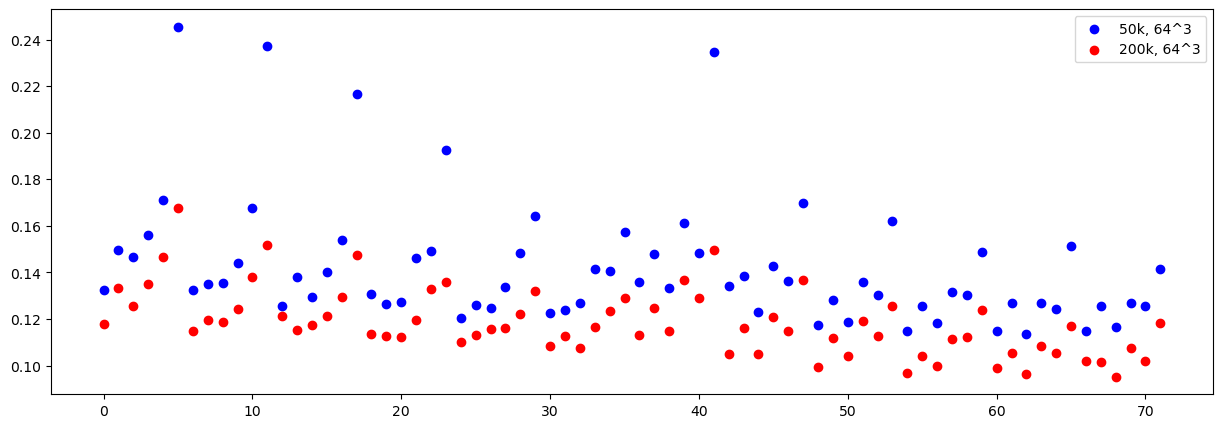

In [17]:
plt.figure(figsize = (15, 5))
plt.scatter(range(len(validation_loss_50_mean)), comparison['50k mean'], color = 'b', label = '50k, 64^3')
plt.scatter(range(len(validation_loss_200_mean)), comparison['200k mean'], color = 'r', label = '200k, 64^3')
plt.legend()
plt.show()

In [18]:
two_hundred_agg[two_hundred_agg['validation_loss']['mean'] < 0.1]

Name activation_fn kernel_size epochs_choice  \
                                                                              
40   3DCNN_200000_5_ReLU_15_0.001_4          ReLU         5.0            15   
42  3DCNN_200000_5_ReLU_20_0.0001_4          ReLU         5.0            20   
43   3DCNN_200000_5_ReLU_20_0.001_4          ReLU         5.0            20   
45  3DCNN_200000_5_ReLU_25_0.0001_4          ReLU         5.0            25   
46   3DCNN_200000_5_ReLU_25_0.001_4          ReLU         5.0            25   
48  3DCNN_200000_5_ReLU_30_0.0001_4          ReLU         5.0            30   

   learning_rate validation_loss                                
                            mean    median       var       std  
40        0.0010        0.099493  0.098245  0.000005  0.002243  
42        0.0001        0.099810  0.100096  0.000007  0.002598  
43        0.0010        0.097007  0.096405  0.000001  0.001047  
45        0.0001        0.096453  0.096227  0.000001  0.001108  
46        0.0010        0.098889  0.098988  0.000015  0.003855  
48        0.0001        0.095176  0.094540  0.000005  0.002191

In [19]:
fifty_agg[fifty_agg['validation_loss']['mean'] < 0.12]

Name activation_fn kernel_size epochs_choice  \
                                                                             
39  3DCNN_50000_5_ReLU_15_0.0001_4          ReLU         5.0            15   
40   3DCNN_50000_5_ReLU_15_0.001_4          ReLU         5.0            15   
42  3DCNN_50000_5_ReLU_20_0.0001_4          ReLU         5.0            20   
43   3DCNN_50000_5_ReLU_20_0.001_4          ReLU         5.0            20   
45  3DCNN_50000_5_ReLU_25_0.0001_4          ReLU         5.0            25   
46   3DCNN_50000_5_ReLU_25_0.001_4          ReLU         5.0            25   
48  3DCNN_50000_5_ReLU_30_0.0001_4          ReLU         5.0            30   
49   3DCNN_50000_5_ReLU_30_0.001_4          ReLU         5.0            30   

   learning_rate validation_loss                                    
                            mean    median           var       std  
39        0.0001        0.118665  0.119043  5.578672e-06  0.002362  
40        0.0010        0.117456  0.116645  3.411739e-06  0.001847  
42        0.0001        0.118362  0.118248  6.960216e-08  0.000264  
43        0.0010        0.114787  0.114263  3.441419e-06  0.001855  
45        0.0001        0.113405  0.113318  6.779964e-07  0.000823  
46        0.0010        0.114742  0.116616  1.201001e-05  0.003466  
48        0.0001        0.116423  0.116500  3.362009e-06  0.001834  
49        0.0010        0.114969  0.115459  4.589750e-06  0.002142